#predicting stock market using LSTM algorithm

In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
#pip install yfinance

In [2]:
import yfinance as yfin
yfin.pdr_override()

In [4]:
#pip install pandas_datareader

In [3]:
from pandas_datareader import data as pdr

In [4]:
#df=pd.read_csv('AAPL.csv')
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end='2019-12-17')
print(df)

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-01-03  14.621429  14.732143  14.607143  14.686786  12.482924  302220800
2012-01-04  14.642857  14.810000  14.617143  14.765714  12.550010  260022000
2012-01-05  14.819643  14.948214  14.738214  14.929643  12.689340  271269600
2012-01-06  14.991786  15.098214  14.972143  15.085714  12.821993  318292800
2012-01-09  15.196429  15.276786  15.048214  15.061786  12.801654  394024400
...               ...        ...        ...        ...        ...        ...
2019-12-10  67.150002  67.517502  66.464996  67.120003  65.565025   90420400
2019-12-11  67.202499  67.775002  67.125000  67.692497  66.124260   78756800
2019-12-12  66.945000  68.139999  66.830002  67.864998  66.292770  137310400
2019-12-13  67.864998  68.824997  67.732498  68.787498  67.193886  133587600
2019-12

In [5]:
# creat the 'Close Cloumn'
data=df.filter(['Close'])

# convert to numpy
dataset=data.values

In [6]:
dataset.shape

(2002, 1)

In [7]:
# scale the data
scalar=MinMaxScaler(feature_range=(0,1))
scaled_data=scalar.fit_transform(dataset)

#scaled_data

In [8]:
#trained data
training_len=math.ceil(len(dataset)*0.8)
training_data=scaled_data[0:training_len,:]

In [9]:
x_train=[]
y_train=[]

In [10]:
for i in range(60,len(training_data)):
    x_train.append(training_data[i-60:i,0])
    y_train.append(training_data[i,0])
    

In [11]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [12]:
x_train.shape

(1542, 60)

In [13]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [14]:
x_train.shape

(1542, 60, 1)

In [15]:
#build the lstm2 with dropout
model1=Sequential()
model1.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model1.add(Dropout(0.5))
model1.add(LSTM(50,return_sequences=False))
model1.add(Dense(25))
model1.add(Dense(1))

In [16]:
#compile the model with different optimizer
model1.compile(optimizer='rmsprop',loss='mean_squared_error')

In [17]:
#train the model
model1.fit(x_train,y_train,batch_size=1,epochs=1)

1542/1542 [==============================] - 44s 26ms/step - loss: 0.0015


In [18]:
# Creating the testing dataset

test_data=scaled_data[training_len-60:,:]
print(len(test_data))
x_test=[] 
y_test=dataset[training_len:,:]
print(len(test_data))
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

460
460


In [19]:
#convert x_test to numpy arrays
x_test=np.array(x_test)

In [20]:
x_test.shape

(400, 60)

In [21]:
y_test.shape

(400, 1)

In [22]:
# Reshape x_test

x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [23]:
x_test.shape

(400, 60, 1)

In [24]:
# Prediction
predictions=model1.predict(x_test)
predictions=scalar.inverse_transform(predictions)


In [25]:
# The root mean squared error
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

3.6742700576782226

c:\users\pc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


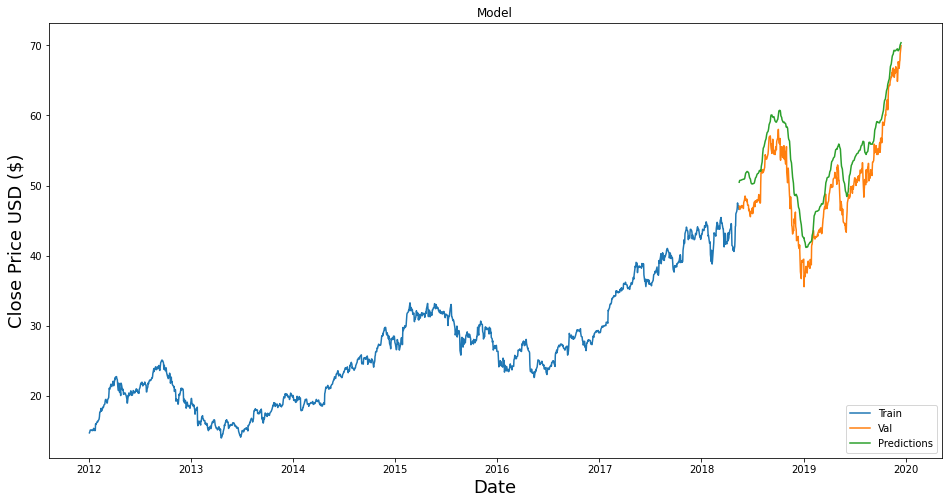

In [26]:
#Plot the data

train=data[:training_len]
valid=data[training_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)' , fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [27]:
valid

,Close,Predictions
Date,,
2018-05-16,47.044998,50.466507
2018-05-17,46.747501,50.642849
2018-05-18,46.577499,50.732510
2018-05-21,46.907501,50.749779
2018-05-22,46.790001,50.764221
...,...,...
2019-12-10,67.120003,69.523689
2019-12-11,67.692497,69.674484
2019-12-12,67.864998,69.875076


In [28]:
aapl = pdr.get_data_yahoo('AAPL', start='2012-01-01', end='2019-12-17')

[*********************100%***********************]  1 of 1 completed


In [29]:
new_df=aapl.filter(['Close'])

In [30]:
new_df

,Close
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786
...,...
2019-12-10,67.120003
2019-12-11,67.692497
2019-12-12,67.864998


In [31]:
aapl = pdr.get_data_yahoo('AAPL', start='2012-01-01', end='2019-12-17')
new_df=aapl.filter(['Close'])


# Get the last 60 day Closing price values and convert the dataframe to an array
last_60_days=new_df[-60:].values


# Scale the data to be values between 0 and 1
last_60_days_scaled=scalar.transform(last_60_days)


X_test=[]
X_test.append(last_60_days_scaled)

# Convert the numpy array
X_test=np.array(X_test)

# Reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred_price=model1.predict(X_test)

# Get the predicted scalar price
pred_price=scalar.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
[[70.805824]]


In [32]:
aapl_2= pdr.get_data_yahoo('AAPL', start='2019-12-17', end='2019-12-20')
print(aapl_2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2019-12-17    70.102501
2019-12-18    69.934998
2019-12-19    70.004997
Name: Close, dtype: float64
